# EMail Spam Detection
Oasis Infobyte

Intern Name- Pradeep More

#  Importing Libraries

In [1]:
import pandas as pd
import numpy as np

# for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

C:\Users\dell\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#  Importing Dataset

In [5]:
df = pd.read_csv("F:/Oasis Infobyte/Spam/spam.csv", encoding="ISO-8859-1")

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Preprocessing and EDA

In [10]:
# Drop unnecessary columns from the DataFrame
columns_to_remove = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
df = df.drop(columns_to_remove, axis=1)

In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.shape

(5572, 2)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [14]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [15]:
df["v1"].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

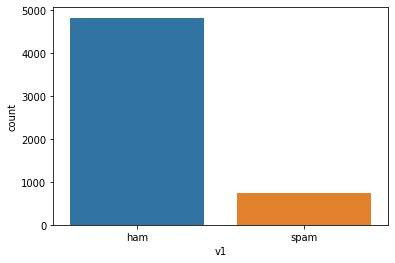

In [16]:
sns.countplot(data=df, x='v1')

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['v1']=encoder.fit_transform(df['v1'])

In [18]:
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

# Splitting the data into features (X) and target (Y)

In [20]:
# Splitting the data into features (X) and target (Y)
X = df["v2"]
Y = df["v1"]

# Splitting the data into training and test sets

In [21]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# Feature Extraction using TF-IDF

In [22]:
# TF-IDF feature extraction
tfidf_vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = tfidf_vectorizer.fit_transform(X_train)
X_test_features = tfidf_vectorizer.transform(X_test)

# Model Building

In [24]:
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

# Model Evaluation

In [29]:
# Model evaluation
prediction_on_train_set = model.predict(X_train_features)
accuracy_on_train_set = accuracy_score(Y_train, prediction_on_train_set)
print("Accuracy on train set: ", accuracy_on_train_set)

prediction_on_test_set = model.predict(X_test_features)
accuracy_on_test_set = accuracy_score(Y_test, prediction_on_test_set)
print("acuuracy on test set: ", accuracy_on_test_set)

Accuracy on train set:  0.9669230769230769
acuuracy on test set:  0.9527511961722488


# Confusion Matrix

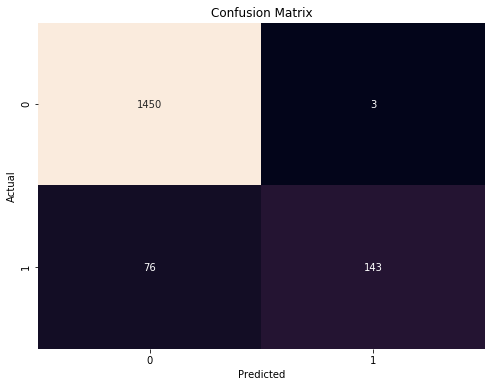

In [34]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(Y_test, prediction_on_test_set)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report

In [36]:
# Classification report
classification_rep = classification_report(Y_test, prediction_on_test_set,target_names=['Ham', 'Spam'])
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

         Ham       0.95      1.00      0.97      1453
        Spam       0.98      0.65      0.78       219

    accuracy                           0.95      1672
   macro avg       0.96      0.83      0.88      1672
weighted avg       0.95      0.95      0.95      1672



# Make Predictions on New Input

In [38]:
input_your_mail = "Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed å£1000 cash or å£5000 prize!"
input_data_features = tfidf_vectorizer.transform([input_your_mail])
prediction = model.predict(input_data_features)
if prediction[0] == 1:
    print("Spam Mail")
else:
    print("Ham Mail")

Spam Mail


In [39]:
input_your_mail = "Dont worry. I guess he's busy."
input_data_features = tfidf_vectorizer.transform([input_your_mail])
prediction = model.predict(input_data_features)
if prediction[0] == 1:
    print("Spam Mail")
else:
    print("Ham Mail")

Ham Mail
